## Calculate t-SNE projections

In [ ]:
import os
os.chdir('/notebooks/src/CIFAR-10/')
import time
from lib.load_images import load_data
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = load_data()

from sklearn.manifold import TSNE

import pickle

## Saving the objects:
# with open('features_imgsize_224.pickle', 'w') as f:  # Python 3: open(..., 'wb')
#     pickle.dump([features_train, features_test], f)

# Getting back the objects:
with open('features_imgsize_224.pickle') as f:  # Python 3: open(..., 'rb')
    features_train, features_test = pickle.load(f)


import numpy as np
X_train = np.squeeze(features_train)
X_test = np.squeeze(features_test)

start = time.time()
tsne_features = TSNE(n_components=2).fit_transform(X_train[0:25000])
end = time.time()

(end-start) / 60

np.savez('tsne_features_224', tsne_features=tsne_features)

## Plot t-SNE projections

In [14]:
import os
os.chdir('/notebooks/src/CIFAR-10/')
import numpy as np
tsne_features = np.load('tsne_features_VGG_224.npz')['tsne_features']

data loaded


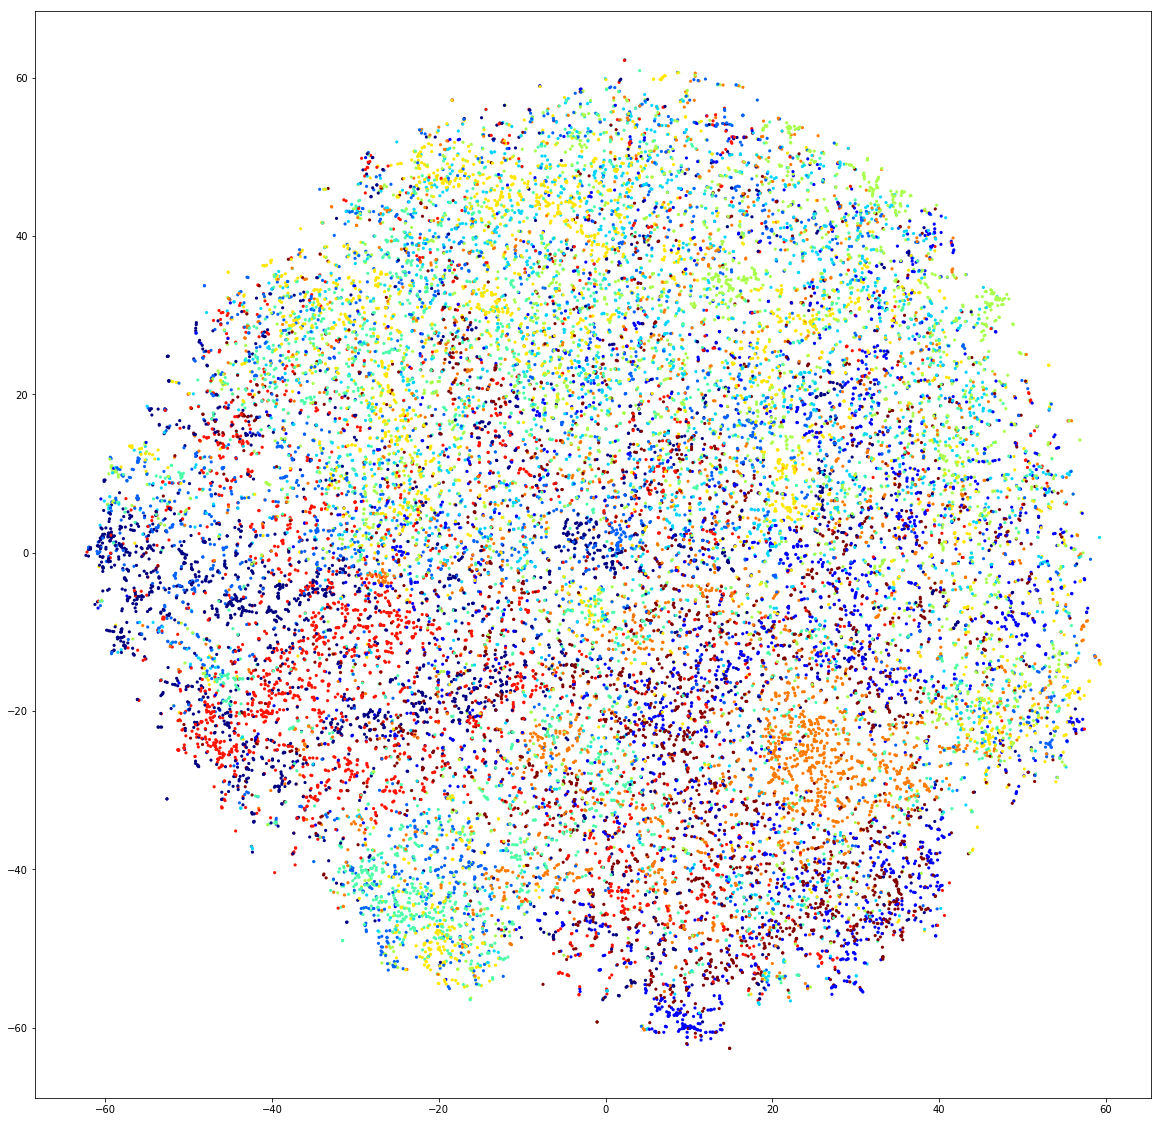

In [16]:
(_, y_train), (_, y_test) = cifar10.load_data()
y_train = np.squeeze(y_train)
print('data loaded')

y_train[0:25000].shape

tsne_features[:,0].shape

tsne_features[:,1].shape

y_train[4]/10.0

from matplotlib import cm

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=(y_train[0:25000]/10.0), s=10, edgecolors='none', cmap=cm.jet)
plt.show()